In [9]:
# @title Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# @title Load and Prepare the Data
# Load the dataset
url = r'/content/adulteration_dataset_26_08_2021.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())



  Brand  Acquisition  Concentration_Class  Concentration  399.40nm  404.39nm  \
0    C1            2                   50           50.0  1.029176  1.056051   
1    C1            2                   50           50.0  1.053778  1.070452   
2    C1            2                   50           50.0  1.088773  1.042955   
3    C1            2                   50           50.0  1.040980  1.050815   
4    C1            2                   50           50.0  1.114777  1.039309   

   409.38nm  414.37nm  419.37nm  424.38nm  ...  1020.10nm  1025.55nm  \
0  1.038291  1.034530  0.999627  0.912370  ...   0.348729   0.351380   
1  1.054946  1.033672  1.017340  0.900341  ...   0.360863   0.365784   
2  1.091762  1.024891  1.017998  0.909208  ...   0.359893   0.365922   
3  1.041357  1.032640  1.000945  0.892702  ...   0.375256   0.374532   
4  1.036861  1.014923  0.965831  0.917315  ...   0.360017   0.361234   

   1031.00nm  1036.46nm  1041.92nm  1047.38nm  1052.85nm  1058.32nm  \
0   0.355957   

In [5]:
# @title Preprocess the Data
# Exclude non-numeric columns from the mean calculation
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Define the features and the target
X = data.loc[:, '399.40nm':'1063.79nm']  # Feature columns
y = data['Concentration_Class']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# @title Model Training & Evaluation
# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[211   0   1   0   0   0]
 [  1 387   0   0   0   0]
 [  0   1 362   1   0   0]
 [  0   0   0 366   0   0]
 [  0   0   0   0 379   0]
 [  0   0   0   0   0  26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           5       1.00      1.00      1.00       388
          10       1.00      0.99      1.00       364
          25       1.00      1.00      1.00       366
          50       1.00      1.00      1.00       379
         100       1.00      1.00      1.00        26

    accuracy                           1.00      1735
   macro avg       1.00      1.00      1.00      1735
weighted avg       1.00      1.00      1.00      1735

Accuracy: 0.9976945244956772


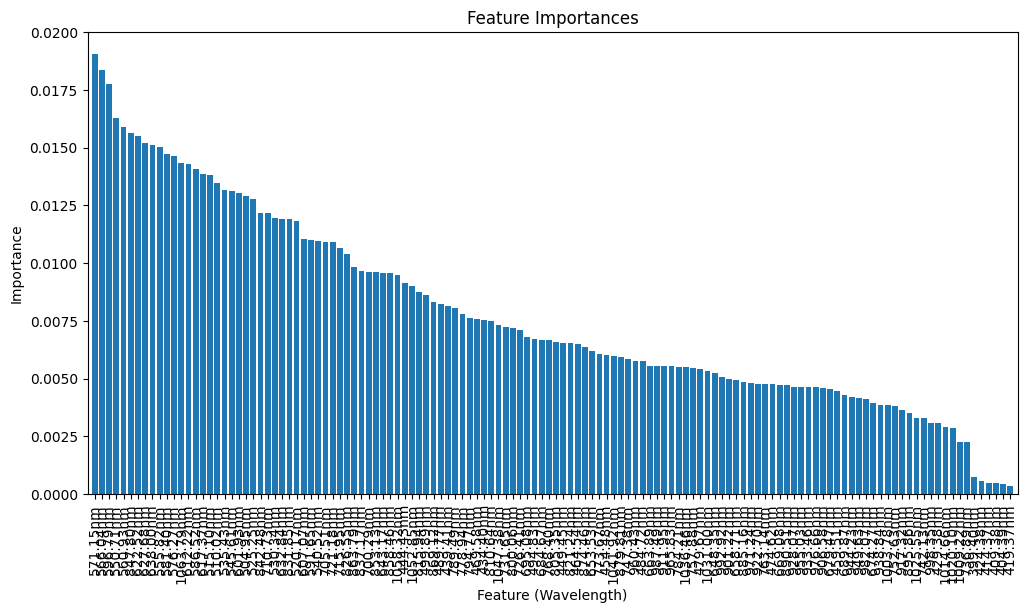

In [7]:
# @title Feature Importance Analysis
# Extracting feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature (Wavelength)')
plt.ylabel('Importance')
plt.show()


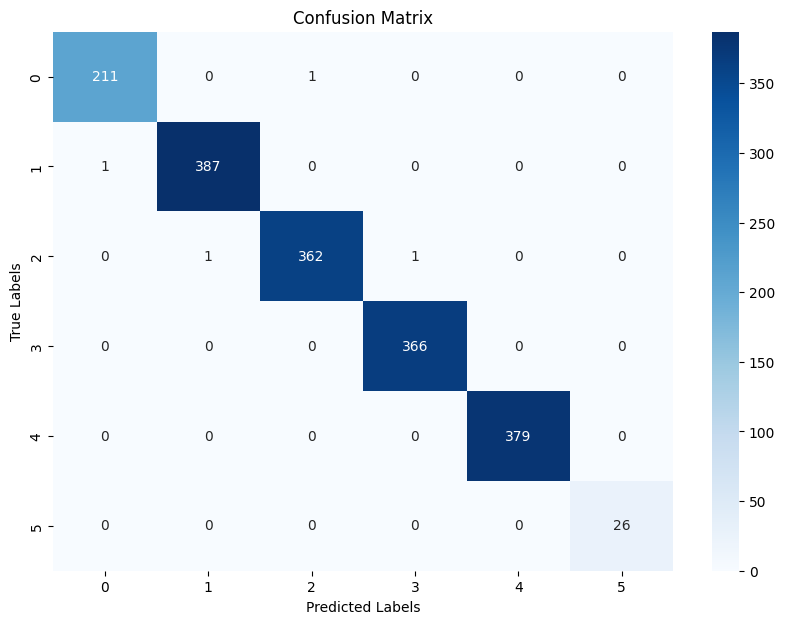

In [10]:
# @title Confusion Matrix Heatmap
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [16]:
# @title Training for unbalnced dataset as well
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
import numpy as np

# Compute class weights for balancing the training data
weights = class_weight.compute_class_weight('balanced',
                                            classes=np.unique(y_train),
                                            y=y_train)
class_weights = dict(zip(np.unique(y_train), weights))

# Create the RandomForest model with class weights
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)

# Train the model
model.fit(X_train_scaled, y_train)



RandomForestClassifier(class_weight={0: 1.3802704852824184,
                                     5: 0.7405036278275715,
                                     10: 0.8054781801299907,
                                     25: 0.8066015806601581,
                                     50: 0.7481673134971971,
                                     100: 9.327956989247312},
                       random_state=42)

In [17]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 99.54%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       212
           5       0.99      1.00      0.99       388
          10       0.99      0.99      0.99       364
          25       0.99      0.99      0.99       366
          50       1.00      1.00      1.00       379
         100       1.00      1.00      1.00        26

    accuracy                           1.00      1735
   macro avg       1.00      1.00      1.00      1735
weighted avg       1.00      1.00      1.00      1735

Confusion Matrix:
 [[210   1   1   0   0   0]
 [  0 388   0   0   0   0]
 [  0   2 360   2   0   0]
 [  0   1   1 364   0   0]
 [  0   0   0   0 379   0]
 [  0   0   0   0   0  26]]


In [24]:
# @title k-cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# Set up the RandomForest classifier with desired parameters
classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# Implementing 10-fold cross-validation
scores = cross_val_score(classifier, X_train_scaled, y_train, cv=10, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracies per fold:", scores)

# Print the average accuracy and standard deviation
print("Average accuracy: %.2f" % scores.mean())
print("Accuracy standard deviation: %.2f" % scores.std())


Accuracies per fold: [0.98991354 0.99279539 0.99567723 0.99711816 0.99855908 0.99567723
 0.99135447 0.99423631 1.         0.99423631]
Average accuracy: 0.99
Accuracy standard deviation: 0.00


In [26]:
# @title Saving the model
from joblib import dump, load

# Save the model to disk
model_filename = 'random_forest_model.joblib'
dump(model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to random_forest_model.joblib
